In [118]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk

from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load data into data frame
data = pd.read_csv('mtsamples.csv',  index_col=0)

In [24]:
data

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun..."
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN


In [5]:
data.shape

(4999, 5)

In [6]:
data.describe(include='all')

,description,medical_specialty,sample_name,transcription,keywords
count,4999,4999,4999,4966,3931
unique,2348,40,2377,2357,3849
top,An example/template for a routine normal male...,Surgery,Lumbar Discogram,"PREOPERATIVE DIAGNOSIS: , Low back pain.,POSTO...",
freq,12,1103,5,5,81


In [7]:
data['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' SOAP / Chart / Progress Notes', ' Sleep Medicine',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Medicine - Rehab',
       ' Pediatrics - Neonatal', ' Pain Management', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic', ' Autopsy'], dtype=object)

### medical_specialty categories

In [74]:
data['medical_specialty'].value_counts()

 Surgery                          1103
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        372
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  230
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Obstetrics / Gynecology           160
 Urology                           158
 Discharge Summary                 108
 ENT - Otolaryngology               98
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    62
 Psychiatry / Psychology            53
 Office Notes                       51
 Podiatry                           47
 Dermatology                        29
 Dentistry                          27
 Cosmetic / Plastic Surge

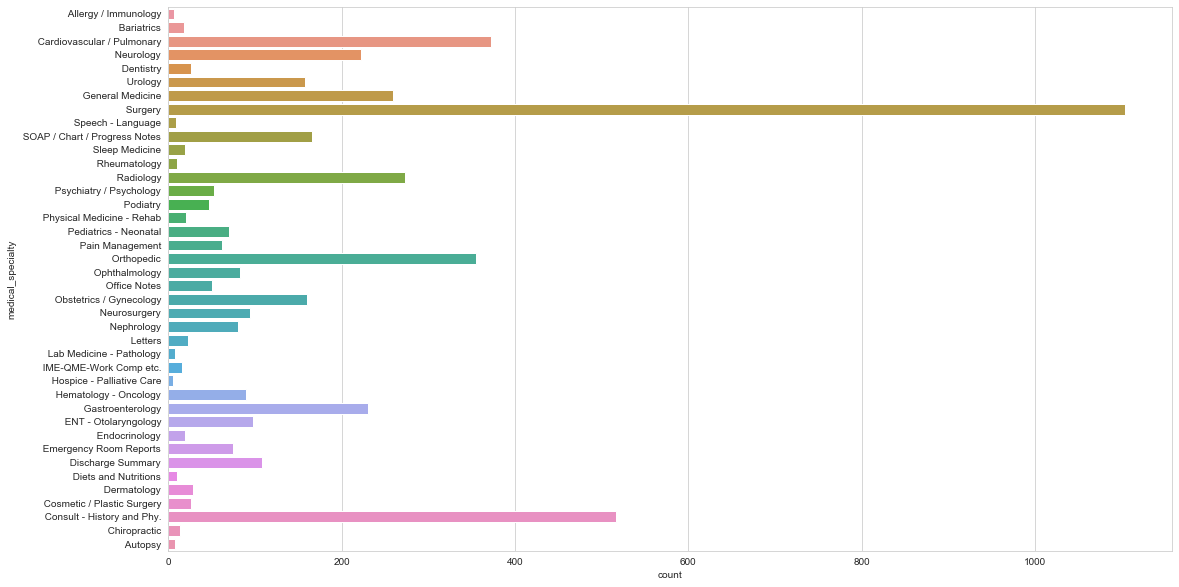

In [45]:
plt.figure(figsize=(18,10))
sns.set_style("whitegrid")
sns.countplot(y='medical_specialty',data=data)
plt.show()

In [9]:
data.iloc[0]['transcription']

'SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not appear to be working very well.  She has used over-the-counter sprays but no prescription nasal sprays.  She does have asthma but doest not require daily medication for this and does not think it is flaring up.,MEDICATIONS: , Her only medication currently is Ortho Tri-Cyclen and the Allegra.,ALLERGIES: , She has no known medicine allergies.,OBJECTIVE:,Vitals:  Weight was 130 pounds and blood pressure 124/78.,HEENT:  Her throat was mildly erythematous without exudate.  Nasal mucosa was erythematous and swollen.  Only clear drainage was seen.  TMs were clear.,Neck:  Supple without adenopathy.,

In [47]:
def wordBarGraphFunction(df,column,title):
    # adapted from https://www.kaggle.com/benhamner/most-common-forum-topic-words
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

def wordCloudFunction(df,column,numWords):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    word_string=str(popular_words_nonstop)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          max_words=numWords,
                          width=1000,height=1000,
                         ).generate(word_string)
    plt.clf()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

The most common words that are described in the text descriptions

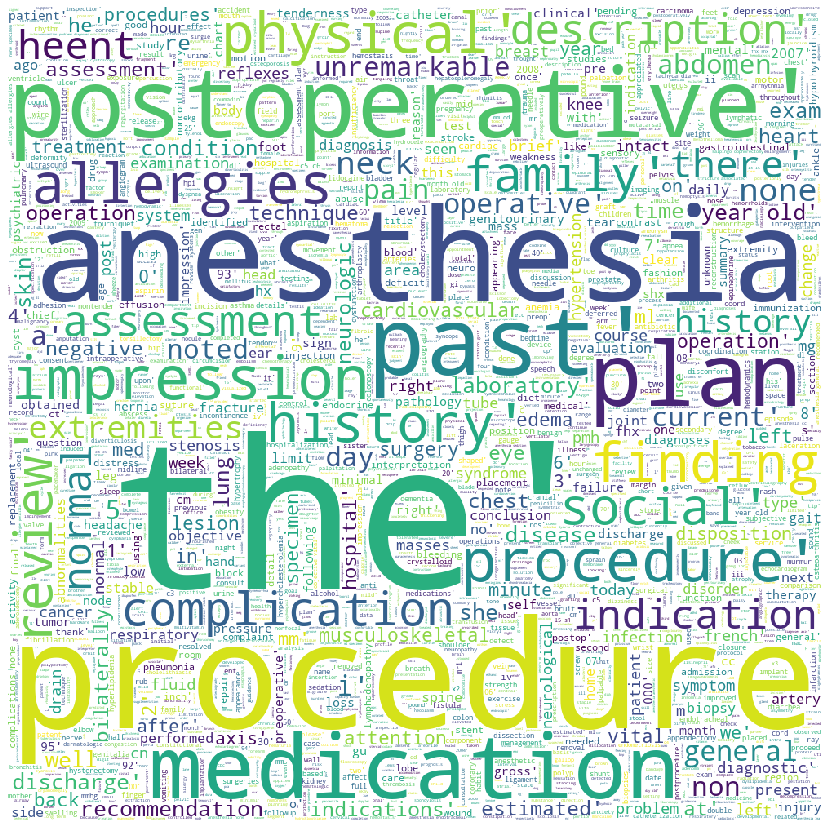

In [52]:
plt.figure(figsize=(15,15))
wordCloudFunction(data,'transcription',10000000)

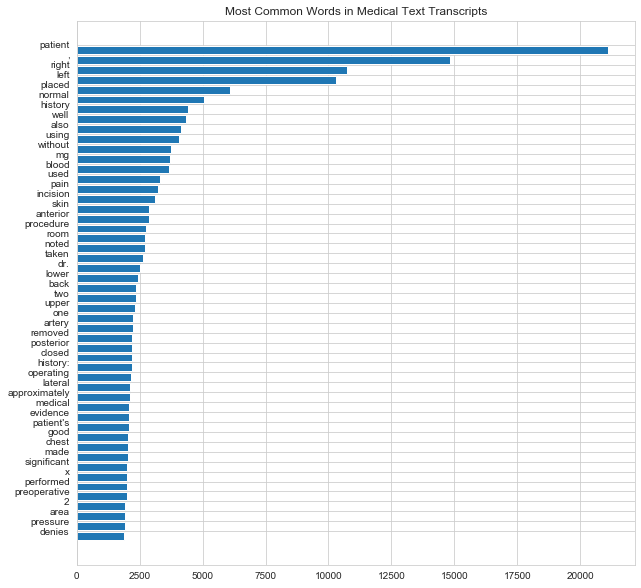

In [54]:
plt.figure(figsize=(10,10))
wordBarGraphFunction(data,'transcription',"Most Common Words in Medical Text Transcripts")

In [12]:
data[data['medical_specialty'] == ' Surgery']

,description,medical_specialty,sample_name,transcription,keywords
174,Austin & Youngswick bunionectomy with Biopro ...,Surgery,Youngswick Bunionectomy,"PREOPERATIVE DIAGNOSES:,1. Hallux rigidus, le...","surgery, hallux rigidus, metatarsal, youngswic..."
177,"This patient has undergone cataract surgery, ...",Surgery,YAG Laser Capsulotomy - 1,"PREOPERATIVE DIAGNOSIS: , Secondary capsular m...","surgery, abraham capsulotomy, yag, yag laser c..."
179,Youngswick osteotomy with internal screw fixa...,Surgery,Youngswick Osteotomy,"TITLE OF OPERATION: , Youngswick osteotomy wit...","surgery, hallux limitus deformity, metatarsoph..."
181,Wound debridement with removal of Surgisis xe...,Surgery,Wound Debridement,"PREOPERATIVE DIAGNOSES,1. Open wound from rig...","surgery, open wound, prosthetic vascular graft..."
182,Visually significant posterior capsule opacit...,Surgery,YAG Laser Capsulotomy,"PREOPERATIVE DIAGNOSIS:, Visually significant...","surgery, capsule opacity, yag, ophthalmic, yag..."
...,...,...,...,...,...
1276,Removal of the hardware and revision of right...,Surgery,AC Separation Revision & Hardware Removal,"PREOPERATIVE DIAGNOSIS:, Right AC separation....","surgery, loose hardware, superior translation,..."
1277,"Excision of abscess, removal of foreign body....",Surgery,Abscess Excision,"PREOPERATIVE DIAGNOSIS: , Recurrent re-infecte...","surgery, sebaceous cyst, prolene suture, incis..."
1278,Congenital chylous ascites and chylothorax an...,Surgery,Abdominal Exploration,"PREOPERATIVE DIAGNOSES: ,1. Congenital chylo...","surgery, intestinal, mesenteric, lymphangiecta..."
1279,Incision and drainage (I&D) of abdominal absc...,Surgery,Abdominal Abscess I&D,"PREOPERATIVE DIAGNOSIS: , Abdominal wall absce...","surgery, excisional debridement, subcutaneous ..."


In [37]:
data.iloc[0:4]['description']

0     A 23-year-old white female presents with comp...
1             Consult for laparoscopic gastric bypass.
2             Consult for laparoscopic gastric bypass.
3                               2-D M-Mode. Doppler.  
Name: description, dtype: object

### Stemming and Lemmatization

In [81]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sannadisasi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [84]:
from nltk.stem import PorterStemmer,WordNetLemmatizer
stemmer = PorterStemmer()
lemm = WordNetLemmatizer()
print("The lemmatized form of leaves is: {}".format(lemm.lemmatize("Leave")))
print("The stemmed form of running is: {}".format(stemmer.stem("Leaves")))
#print("The stemmed form of run is: {}".format(stemmer.stem("run")))

The lemmatized form of leaves is: Leave
The stemmed form of running is: leav


### Text vectorization
Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, need to convert each document into a numeric vector

CountVectorizer and TfidfVectorizer

In [65]:
corpus = data.iloc[0:4]['description']
#stopwords = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
X.toarray()  

['23', 'allergies', 'bypass', 'complaint', 'consult', 'doppler', 'female', 'for', 'gastric', 'laparoscopic', 'mode', 'of', 'old', 'presents', 'white', 'with', 'year']


array([[1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]], dtype=int64)

### Stopword Removal

In [72]:
stop_words = stopwords.words('english')
len(stop_words)

179

In [73]:
corpus = data.iloc[-4:]['description']
vectorizer = CountVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
X.toarray()   

['14', 'acute', 'allergic', 'arthritis', 'asthma', 'baby', 'boy', 'came', 'caucasian', 'complete', 'conjunctivitis', 'coughing', 'crp', 'days', 'diagnosis', 'edema', 'elevated', 'esr', 'etiology', 'female', 'fever', 'follow', 'however', 'kawasaki', 'keflex', 'mild', 'month', 'mother', 'neutrophils', 'old', 'physical', 'presumptive', 'rash', 'reaction', 'resolving', 'rhinitis', 'states', 'suspicious', 'thrombocytosis', 'uncertain', 'wheezing']


array([[1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 1, 0,
        0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0]],
      dtype=int64)

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer = TfidfVectorizer(stop_words = stop_words)
X = tf_vectorizer.fit_transform(corpus)
print(tf_vectorizer.get_feature_names())
X.toarray()  

['14', 'acute', 'allergic', 'arthritis', 'asthma', 'baby', 'boy', 'came', 'caucasian', 'complete', 'conjunctivitis', 'coughing', 'crp', 'days', 'diagnosis', 'edema', 'elevated', 'esr', 'etiology', 'female', 'fever', 'follow', 'however', 'kawasaki', 'keflex', 'mild', 'month', 'mother', 'neutrophils', 'old', 'physical', 'presumptive', 'rash', 'reaction', 'resolving', 'rhinitis', 'states', 'suspicious', 'thrombocytosis', 'uncertain', 'wheezing']


array([[0.19611614, 0.        , 0.        , 0.19611614, 0.        ,
        0.19611614, 0.19611614, 0.19611614, 0.19611614, 0.        ,
        0.19611614, 0.        , 0.19611614, 0.19611614, 0.19611614,
        0.19611614, 0.39223227, 0.19611614, 0.        , 0.        ,
        0.19611614, 0.        , 0.        , 0.19611614, 0.        ,
        0.19611614, 0.19611614, 0.        , 0.19611614, 0.19611614,
        0.        , 0.19611614, 0.19611614, 0.        , 0.19611614,
        0.        , 0.        , 0.        , 0.19611614, 0.        ,
        0.        ],
       [0.        , 0.        , 0.30638797, 0.        , 0.38861429,
        0.        , 0.        , 0.        , 0.        , 0.38861429,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.38861429,
        0.        , 0.38861429, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.38861429, 0.     

### N-Grams and analyzer parameter
N-Gram specifies the upper and lower limit for the range of words/characters to be extracted from text.

In [66]:
vectorizer = CountVectorizer(stop_words = stop_words,ngram_range=(1,2))
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
X.toarray()  

['23', '23 year', 'allergies', 'bypass', 'complaint', 'complaint allergies', 'consult', 'consult laparoscopic', 'doppler', 'female', 'female presents', 'gastric', 'gastric bypass', 'laparoscopic', 'laparoscopic gastric', 'mode', 'mode doppler', 'old', 'old white', 'presents', 'presents complaint', 'white', 'white female', 'year', 'year old']


array([[1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1],
       [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0]], dtype=int64)

In [67]:
vectorizer = CountVectorizer(stop_words = stop_words,ngram_range=(1,3))
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
X.toarray() 

['23', '23 year', '23 year old', 'allergies', 'bypass', 'complaint', 'complaint allergies', 'consult', 'consult laparoscopic', 'consult laparoscopic gastric', 'doppler', 'female', 'female presents', 'female presents complaint', 'gastric', 'gastric bypass', 'laparoscopic', 'laparoscopic gastric', 'laparoscopic gastric bypass', 'mode', 'mode doppler', 'old', 'old white', 'old white female', 'presents', 'presents complaint', 'presents complaint allergies', 'white', 'white female', 'white female presents', 'year', 'year old', 'year old white']


array([[1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

### Topic modelling
Topic Modeling is a technique to extract the hidden topics from large volumes of text.

In [85]:
# Define helper function to print top words
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [99]:
text = list(data.iloc[0:10]['transcription'])
tf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,stop_words = 'english', decode_error='ignore')
#X = tf_vectorizer.fit_transform(corpus)
tf = tf_vectorizer.fit_transform(text)

In [101]:
from sklearn.decomposition import NMF, LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=11, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=11, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [102]:
n_top_words = 40
print("\nTopics in LDA model: ")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:white anesthesia tried muscle mitral including hemorrhoids fashion 15 draped medications 40 current estimated sponge ventricular mmhg stairs aortic anterior seven stable approximately alert valve endotracheal area hepatitis does urinary weight complications site color months level lifting regurgitation weighs high

Topic #1:indication general soft performed overweight running old lateral airline stress motion stable tried 60 stab began effusion medical supple anterior swelling mmhg snoring preoperative 15 ejection arthritis fraction heart muscle gallbladder gu public valve currently emphysema past systolic nerves pain

Topic #2:venous systolic left lv single pounds motion aortic right mmhg liver valve enlargement female normal surgery ejection maximum tricuspid 25 infected sleep fraction previously mild performed good room going placed condition cranial artery general pulmonary asthma anastomosis gastric lifting bowel

Topic #3:climbing injected gastric

In [119]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sannadisasi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sannadisasi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\sannadisasi\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\sannadisasi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

### Part of speech tagging

In [123]:
from nltk import word_tokenize ,pos_tag
text = data.iloc[0]['description']
#text ='European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'
tokens = word_tokenize(text)
print(pos_tag(tokens))

[('European', 'JJ'), ('authorities', 'NNS'), ('fined', 'VBD'), ('Google', 'NNP'), ('a', 'DT'), ('record', 'NN'), ('$', '$'), ('5.1', 'CD'), ('billion', 'CD'), ('on', 'IN'), ('Wednesday', 'NNP'), ('for', 'IN'), ('abusing', 'VBG'), ('its', 'PRP$'), ('power', 'NN'), ('in', 'IN'), ('the', 'DT'), ('mobile', 'JJ'), ('phone', 'NN'), ('market', 'NN'), ('and', 'CC'), ('ordered', 'VBD'), ('the', 'DT'), ('company', 'NN'), ('to', 'TO'), ('alter', 'VB'), ('its', 'PRP$'), ('practices', 'NNS')]


### Entity Extraction

In [124]:
ne_tree = nltk.ne_chunk(pos_tag(word_tokenize(text)))
#print(ne_tree)
ne_tree.draw()